In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import correlate
from scipy.signal import correlation_lags

# Function to calculate correlation
def corr_matrix(x, y, max_index=90):
    # shortest = min(x.shape[0], y.shape[0])
    shortest = max_index
    return np.corrcoef(x.iloc[:shortest].values, y.iloc[:shortest].values)

# Function to plot time series and show the correlation
def plot_correlation(x, y, text):
    # plot
    plt.subplots(figsize=(10, 6))
    x.plot(label="x")
    y.plot(label="y")
    plt.title(f"Correlation {text}: {corr_matrix(x, y)[0, 1]}")
    plt.legend(loc="best")
    plt.show()

# Function to calculate cross-correlation,
# extract the best matching shift and then shift
# one of the series appropriately.
def shift_for_maximum_correlation(x, y):
    correlation = correlate(x, y, mode="full")
    lags = correlation_lags(x.size, y.size, mode="full")
    lag = lags[np.argmax(correlation)]
    print(f"Best lag: {lag}")
    if lag < 0:
        y = y.iloc[abs(lag):].reset_index(drop=True)
    else:
        x = x.iloc[lag:].reset_index(drop=True)
    return x, y

Generate Test Data

In [12]:
# Generate two series that are correlated
original_x = pd.Series(np.random.uniform(size=100))
original_y = 1.3*original_x + np.random.normal(0, 0.1, size=100)

# Now create shifted versions,
# I create two examples, one where x is shifted
# and one where y is.
shifted_versions = [
    (original_x.iloc[10:].reset_index(drop=True), original_y),
    (original_x, original_y.iloc[20:].reset_index(drop=True)),
]

<AxesSubplot:>

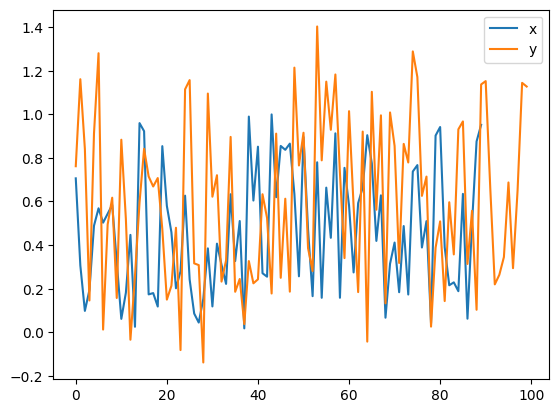

In [13]:
x = pd.DataFrame(shifted_versions[0][0].rename('x'))
y = pd.DataFrame(shifted_versions[0][1].rename('y'))

df = pd.concat([x, y], axis=1)
df.plot()

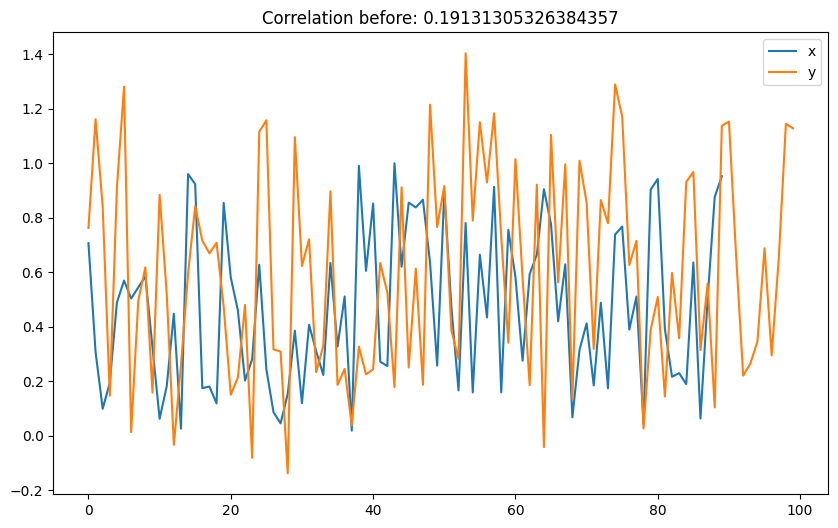

array([[1.        , 0.19131305],
       [0.19131305, 1.        ]])

In [14]:
plot_correlation(df.x, df.y, 'before')
corr_matrix(df.x, df.y)

<AxesSubplot:>

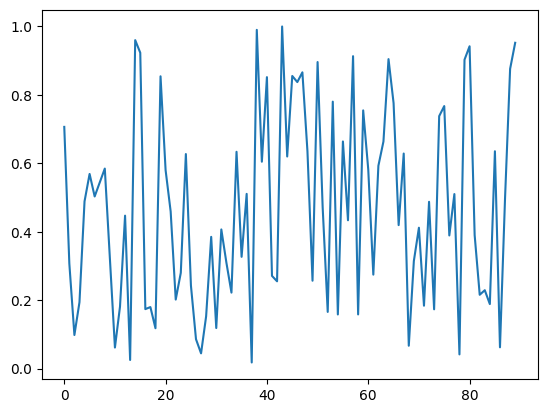

In [15]:
df.x[0:90].plot()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       189 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB
None


,0
0,0.796149
1,1.154048
2,0.921011
3,0.738161
4,1.412126
...,...
184,1.969686
185,1.500788
186,2.196285
187,1.772020


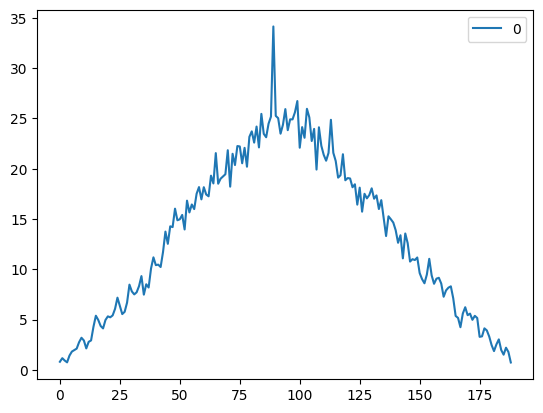

In [16]:
corr = correlate(df.x[0:90], df.y, mode='full')
corr = pd.DataFrame(corr)
corr.plot()
print(corr.info())
corr

In [17]:
lags = correlation_lags(df.x[0:90].size, df.y.size, mode="full")
lags

array([-99, -98, -97, -96, -95, -94, -93, -92, -91, -90, -89, -88, -87,
       -86, -85, -84, -83, -82, -81, -80, -79, -78, -77, -76, -75, -74,
       -73, -72, -71, -70, -69, -68, -67, -66, -65, -64, -63, -62, -61,
       -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48,
       -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35,
       -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22,
       -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,
        -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,
         5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  8

In [18]:
lag = lags[np.argmax(corr.values)]
lag

-10

Best lag: -9


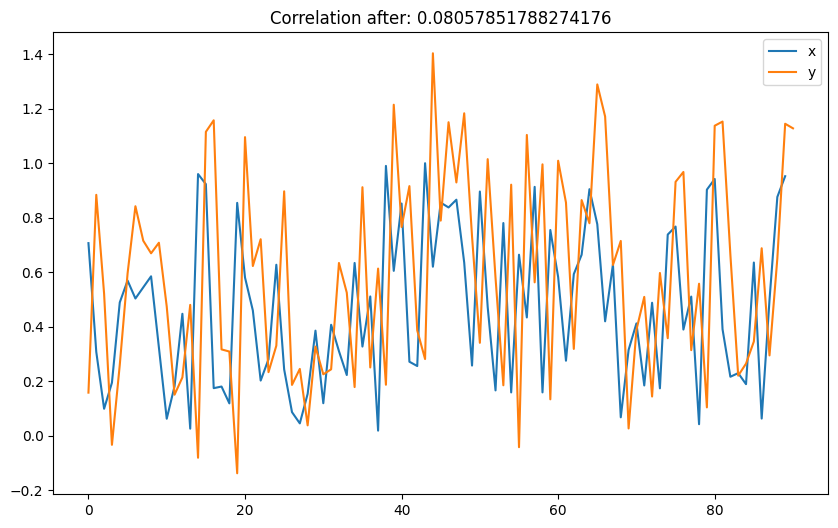

In [19]:
x, y = shift_for_maximum_correlation(df.x, df.y)
plot_correlation(x, y, 'after')

Best lag: -10


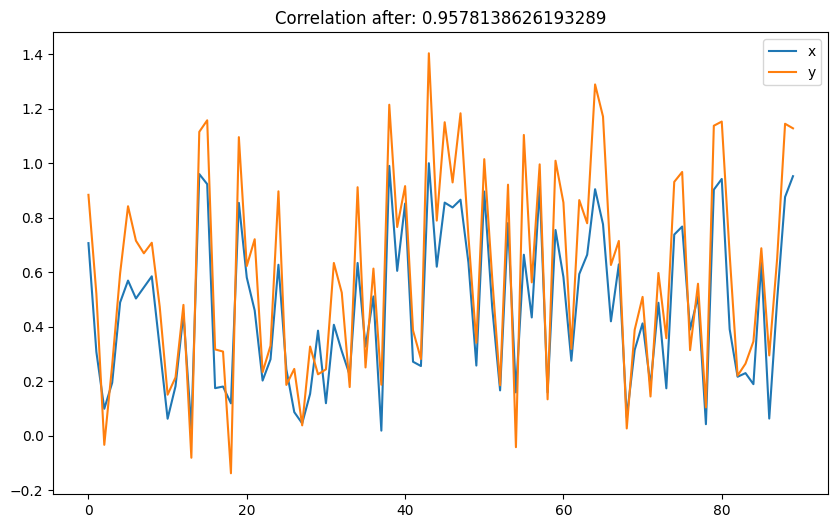

In [20]:
x, y = shift_for_maximum_correlation(df.x[0:90], df.y)
plot_correlation(x, y, 'after')